In [1]:
import json
import requests
#from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

In [2]:
# Load a file as a DataFrame and assign to df
df = pd.read_excel("Data/ACT_DESAGREGADO.xlsx")

In [3]:
df.keys()

Index(['NUMERO IDENTIFICACION', 'NOMBRE ENCUESTA\n', 'PREGUNTA\n', 'RESPUESTA',
       'FE_RESULTADO'],
      dtype='object')

In [4]:
df.columns = ['id', 'encuesta', 'pregunta', 'respuesta',
       'fecha']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8602 entries, 0 to 8601
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         8602 non-null   int64         
 1   encuesta   8602 non-null   object        
 2   pregunta   8602 non-null   object        
 3   respuesta  8602 non-null   object        
 4   fecha      8602 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 336.1+ KB


In [6]:
# Cambiar texto a minuscula.
a = df['pregunta'].dtype

for col in df.columns:
    if df[col].dtype == a:
        df[col] = df[col].str.lower()

In [7]:
df

,id,encuesta,pregunta,respuesta,fecha
0,535255,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,pocas veces,2012-06-29
1,535255,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,1 o 2 veces a la semana,2012-06-29
2,535255,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,de 2 a 3 noches en a la semana,2012-06-29
3,535255,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,1 vez a la semana o menos,2012-06-29
4,535255,prueba de control del asma act,¿como calificaria el control de su asma durant...,bien controlada,2012-06-29
...,...,...,...,...,...
8597,744564,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,pocas veces,2020-05-20
8598,744564,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,1 o 2 veces a la semana,2020-05-20
8599,744564,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,nunca,2020-05-20
8600,744564,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,1 vez a la semana o menos,2020-05-20


## ID analisis ##

In [8]:
id_df = pd.DataFrame(df["id"].value_counts()).reset_index()
id_df.columns = ['id', 'count']
print(id_df['count'].sum())
id_df

8602


,id,count
0,916510,100
1,739693,95
2,1617372,90
3,1382077,82
4,1764814,80
...,...,...
451,1625263,5
452,514102,5
453,978163,5
454,1750189,5


In [9]:
pd.DataFrame(df["encuesta"].value_counts()).reset_index()

,index,encuesta
0,prueba de control del asma act,8602


## Pregunta y Respuesta Analisis ##

In [10]:
pd.DataFrame(df["pregunta"].value_counts()).reset_index()

,index,pregunta
0,durante las ultimas 4 semanas ¿con que frecuen...,1715
1,durante las ultimas 4 semanas ¿con que frecuen...,1715
2,durante las ultimas 4 semanas ¿con que frecuen...,1715
3,¿como calificaria el control de su asma durant...,1715
4,durante las ultimas 4 semanas ¿con que frecuen...,1715
5,¿cuan satisfecho esta con el apoyo que tiene d...,1
6,¿cual es su capacidad de concentracion?,1
7,¿cuan satisfecho esta con su sueño?,1
8,¿es capaz de aceptar su apariencia fisica?,1
9,¿cuanto necesita de cualquier tratamiento medi...,1


Aca decidimos solo quedarnos con las 4 primeras, que son preguntas mensuales.

In [11]:
lista = pd.DataFrame(df["pregunta"].value_counts()).reset_index().iloc[:5,0]

In [12]:
for i in lista:
    print('preg ',i)

preg  durante las ultimas 4 semanas ¿con que frecuencia sintio falta de aire?
preg  durante las ultimas 4 semanas ¿con que frecuencia su asma le impidio llevar a cabo sus tareas habituales en el trabajo, el estudio o el hogar?
preg  durante las ultimas 4 semanas ¿con que frecuencia uso su inhalador de efecto inmediato o se hizo nebulizaciones (por ejemplo, salbutamol?)
preg  ¿como calificaria el control de su asma durante las ultimas 4 semanas?
preg  durante las ultimas 4 semanas ¿con que frecuencia los sintomas de asma (silbidos en el pecho, tos, falta de aire, opresion o dolor en el pecho) lo/la hicieron despertar durante la noche o mas temprano que de costumbre por la mañana?


In [13]:
# cambiar nombre de las preguntas:
corto = np.array(['uso inhalador','afecto el sueño','afecto actividad usual','control del asma','falta de aire'])

In [14]:
corto[0]

'uso inhalador'

Estudiar las respuestas

In [15]:
pd.DataFrame(df["respuesta"].value_counts()).reset_index()

,index,respuesta
0,nunca,2676
1,bien controlada,914
2,1 o 2 veces a la semana,579
3,pocas veces,507
4,1 vez a la semana o menos,445
5,una o dos veces,415
6,algo controlada,333
7,totalmente controlada,318
8,1 o 2 veces al dia,264
9,algunas veces,257


Con lo visto anteriormente, decido tomar solo las 5 primeras preguntas

## recortando el dataframe:

In [18]:
df.drop_duplicates().reset_index(drop=True)

,id,encuesta,pregunta,respuesta,fecha
0,535255,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,pocas veces,2012-06-29
1,535255,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,1 o 2 veces a la semana,2012-06-29
2,535255,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,de 2 a 3 noches en a la semana,2012-06-29
3,535255,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,1 vez a la semana o menos,2012-06-29
4,535255,prueba de control del asma act,¿como calificaria el control de su asma durant...,bien controlada,2012-06-29
...,...,...,...,...,...
8536,744564,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,pocas veces,2020-05-20
8537,744564,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,1 o 2 veces a la semana,2020-05-20
8538,744564,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,nunca,2020-05-20
8539,744564,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,1 vez a la semana o menos,2020-05-20


In [19]:
df[df['pregunta'] == lista[0]]

,id,encuesta,pregunta,respuesta,fecha
1,535255,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,1 o 2 veces a la semana,2012-06-29
6,1680091,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,1 o 2 veces a la semana,2012-09-27
11,739693,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,1 o 2 veces a la semana,2012-11-09
16,1101180,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,1 o 2 veces a la semana,2012-06-29
21,895520,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,mas de una vez al dia,2012-09-05
...,...,...,...,...,...
8578,1266254,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,una vez al dia,2020-03-12
8583,1007665,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,nunca,2020-04-14
8588,1331954,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,nunca,2020-03-19
8593,1671919,prueba de control del asma act,durante las ultimas 4 semanas ¿con que frecuen...,de 3 a 6 veces a la semana,2020-04-20


In [20]:
df = df.drop(columns=['encuesta'])
for j in range(len(lista)):
    df = df.replace(to_replace =lista[j], 
                 value =corto[j]) 

In [21]:
# Quedandonos solo con las por preguntas
df_list = []
for i in corto: 
    temp_df = df[df['pregunta'] == i]
    df_list.append(temp_df)  # store for later concatenation

# si hay varios factores solo toca los distintos
df = pd.concat(df_list, axis=0).reset_index(drop=True)
df

,id,pregunta,respuesta,fecha
0,535255,uso inhalador,1 o 2 veces a la semana,2012-06-29
1,1680091,uso inhalador,1 o 2 veces a la semana,2012-09-27
2,739693,uso inhalador,1 o 2 veces a la semana,2012-11-09
3,1101180,uso inhalador,1 o 2 veces a la semana,2012-06-29
4,895520,uso inhalador,mas de una vez al dia,2012-09-05
...,...,...,...,...
8570,1266254,falta de aire,de 2 a 3 noches en a la semana,2020-03-12
8571,1007665,falta de aire,nunca,2020-04-14
8572,1331954,falta de aire,una o dos veces,2020-03-19
8573,1671919,falta de aire,nunca,2020-04-20


In [22]:
print(df.groupby(["pregunta","respuesta"])["id"].count().reset_index(name="count")\
.sort_values(by="pregunta", ascending = False).reset_index(drop=True).sum())
df.groupby(["pregunta","respuesta"])["id"].count().reset_index(name="count")\
.sort_values(by="pregunta", ascending = False).reset_index(drop=True)

pregunta     uso inhaladoruso inhaladoruso inhaladoruso inh...
respuesta    una vez al dianuncamas de una vez al diade 3 a...
count                                                     8575
dtype: object


,pregunta,respuesta,count
0,uso inhalador,una vez al dia,127
1,uso inhalador,nunca,639
2,uso inhalador,mas de una vez al dia,178
3,uso inhalador,de 3 a 6 veces a la semana,192
4,uso inhalador,1 o 2 veces a la semana,579
5,falta de aire,una vez a la semana,155
6,falta de aire,una o dos veces,415
7,falta de aire,nunca,741
8,falta de aire,mas de 4 noches a la semana,157
9,falta de aire,de 2 a 3 noches en a la semana,247


## Analisis Fecha##

In [25]:
date_df = pd.DataFrame(df["fecha"].value_counts()).reset_index()
date_df.columns = ['fecha', 'count']
date_df = date_df.sort_values(by=['fecha']).reset_index(drop = True)
date_df.tail()

,fecha,count
521,2020-05-22,10
522,2020-05-26,10
523,2020-05-27,30
524,2020-05-28,25
525,2020-05-29,10


Text(0, 0.5, 'preguntas')

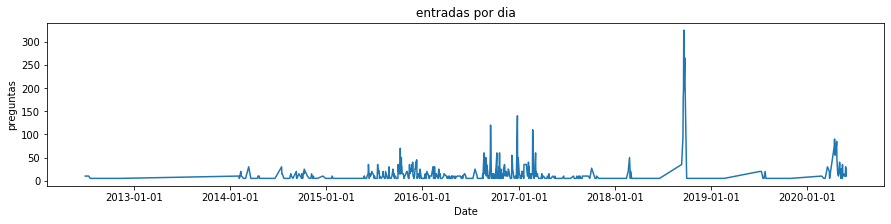

In [26]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(date_df["fecha"], date_df["count"])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))  # format x-axis display
plt.title("entradas por dia")
plt.xlabel("Date")
plt.ylabel("preguntas")